In [81]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.externals as extjoblib
import joblib
from sklearn import tree
from matplotlib import pyplot as plt

#joblib: used to save models created

In [2]:
df=pd.read_csv("music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [4]:
# Clean data and split the dataset
X=df.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [6]:
y=df['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [10]:
# prediction and creating model
model = DecisionTreeClassifier()
model.fit(X,y)
predictions = model.predict([[21,1],[22,0]])
predictions

C:\Users\subit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [63]:
# calculating accuracy
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test,predictions)
score


0.75

In [72]:
# persistant model
#storing the model for future you so that we don't need to train it again
joblib.dump(model,'Music-Reccommender.joblib')

['Music-Reccommender.joblib']

In [75]:
#loading the stored model
model1 = joblib.load('Music-Reccommender.joblib')
predictions = model.predict([[21,1]])
predictions

C:\Users\subit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.755\nsamples = 14\nvalue = [1, 5, 3, 3, 2]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.716\nsamples = 9\nvalue = [1, 0, 3, 3, 2]\nclass = Dance'),
 Text(0.25, 0.375, 'age <= 25.5\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 27.0\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 2]\nclass = HipHop'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]\nclass = Classical')]

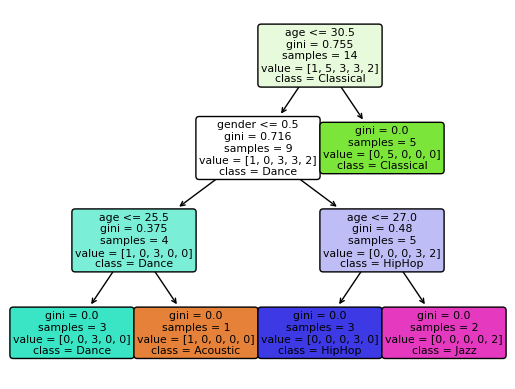

In [89]:
# data visualization
tree.plot_tree(model, feature_names=['age','gender'],class_names=sorted(y.unique()),
              label = 'all', rounded =True,filled=True)